## Example Module

In [1]:
from skimage.external import tifffile
import itertools as it
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

Read array and omexml

In [3]:
with tifffile.TiffFile(r'c:\Users\m1srh\OneDrive - Carl Zeiss AG\IPython_Notebooks\APEER\particleimage.ome.tiff') as tif:
    array6D = tif.asarray()
    omexml = tif[0].image_description

Test array and omexml

In [4]:
np.shape(array6D) # Series, T, Z, C, X, Y

(1, 1, 1, 1, 11313, 11286)

In [5]:
omexml[:200]

b'<?xml version="1.0" encoding="UTF-8"?><OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy'

Apply image transformation

In [6]:
# 2D Function
def autoThresholding(image2D):
    thresh = threshold_otsu(image2D)
    binary = image2D > thresh
    return binary

In [7]:
# Apply 2D function to 6D array        
binary6D = np.zeros_like(array6D)
nS, nT, nZ, nC, nX, nY = np.shape(array6D)

for s, t, z, c in it.product(range(nS), range(nT), range(nZ), range(nC)):
    binary6D[s,t,z,c,:,:] = autoThresholding(array6D[s,t,z,c,:,:])

Show results

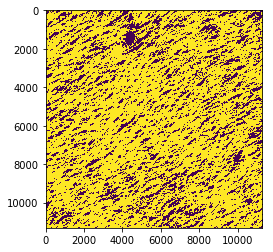

In [9]:
plt.imshow(binary6D[0,0,0,0,:,:])
plt.show()

Write array and omexml to output

In [10]:
tifffile.imsave('thresImage.tif', binary6D * 255, description=omexml, metadata={'axes': 'STZCXY'})

Vorteile:
* Code is easy, short and fast
* No Java Docker ist required

Nachteile:
* Result cannot be displayed as hyperstack with Fiji